In [78]:
# https://pytorch.org/get-started/locally/
# boostcourse - torch
# https://www.boostcourse.org/ai214
!nvidia-smi

Wed Aug 18 01:39:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    33W / 250W |    953MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [79]:
!pip list | grep torch

torch                         1.9.0+cu102
torchsummary                  1.5.1
torchtext                     0.10.0
torchvision                   0.10.0+cu102


In [80]:
import torch
import numpy as np


In [81]:
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [82]:
nums.shape

torch.Size([9])

In [83]:
type(nums)

torch.Tensor

In [84]:
nums.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [85]:
nums.reshape(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [86]:
nums.view(3,3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [87]:
randoms = torch.rand((3,3))
randoms

tensor([[0.8340, 0.2260, 0.9432],
        [0.1307, 0.3080, 0.2135],
        [0.0425, 0.1194, 0.3852]])

In [88]:
zeros = torch.zeros((3,3))
zeros

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [89]:
ones = torch.ones((3,3))
ones

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [90]:
torch.zeros_like(ones)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [91]:
zeros.shape

torch.Size([3, 3])

In [92]:
zeros.size()

torch.Size([3, 3])

In [93]:
nums * 3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [94]:
nums = nums.reshape((3,3))

In [95]:
result = torch.add(nums,10)
result

tensor([[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]])

In [96]:
result.numpy()

array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])

In [97]:
range_nums = torch.arange(9).reshape(3,3)
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [98]:
range_nums.view(-1)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [99]:
range_nums = range_nums.view(-1)
range_nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [100]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [101]:
nums[1]

tensor([3, 4, 5])

In [102]:
arr = np.array([1, 1, 1])
arr

array([1, 1, 1])

In [103]:
arr_torch = torch.from_numpy(arr)
arr_torch

tensor([1, 1, 1])

In [104]:
arr_torch.float()

tensor([1., 1., 1.])

In [105]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [106]:
arr_torch.to(device)
arr_torch.to('cpu')

tensor([1, 1, 1])

In [107]:
x = torch.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [108]:
y = x + 2
y

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [109]:
z = y * y * 3
out = z.mean()

In [110]:
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [111]:
out.backward()

In [112]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [113]:
print(x.requires_grad)
print((x ** 2).requires_grad)

True
True


In [114]:
with torch.no_grad():
    print((x ** 2).requires_grad)

False


In [115]:
from torchvision import datasets, transforms

In [116]:
batch_size = 32
test_batch_size = 32

In [117]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=True, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [118]:
!pip list | grep torchvision

torchvision                   0.10.0+cu102


In [119]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/', train=False, download = True, 
                   transform = transforms.Compose([
                                                    transforms.ToTensor(),
                                                    transforms.Normalize(mean=(0.5,), std = (0.5,))
                   ])),
                   batch_size = batch_size,
                   shuffle = True
)

In [120]:
images, labels = next(iter(train_loader))

In [121]:
# 채널이 먼저 오는것을 알 수 있다.
images.shape

torch.Size([32, 1, 28, 28])

In [122]:
labels.shape

torch.Size([32])

In [123]:
import matplotlib.pyplot as plt


In [124]:
images[0].shape

torch.Size([1, 28, 28])

In [125]:
# 1차원짜리를 날려버린다. squeeze
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [126]:
image = torch_image.numpy()
image.shape

(28, 28)

In [127]:
label = labels[0].numpy()

In [128]:
label

array(2)

<function matplotlib.pyplot.show>

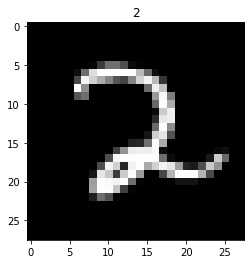

In [129]:
plt.title(label)
plt.imshow(image, 'gray')
plt.show

In [130]:
import torch.nn as nn
import torch.nn.functional as F

In [131]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)# 예시로 보여준것

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [132]:
layer = nn.Conv2d(1, 20, 5, 1).to(device)
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [133]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [134]:
# weight.cpu().detach().numpy() # detach 꺼내온다? 
# weight.shape

weight = weight.cpu().detach().numpy()
weight.shape

(20, 1, 5, 5)

In [135]:
weight[0, 0, :, :]

array([[-0.15940864,  0.17234631, -0.1313602 ,  0.13537064,  0.09336841],
       [ 0.05302134, -0.1757882 , -0.11292654,  0.01321573, -0.13816562],
       [-0.14250515,  0.14393413,  0.02650676,  0.02707899, -0.03715367],
       [ 0.08127043,  0.07684727, -0.02875922,  0.16307537,  0.15072508],
       [-0.00024664,  0.11825357, -0.1191109 , -0.17298184,  0.01502306]],
      dtype=float32)

In [136]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [137]:
light_jet = cmap_map(lambda x: x/2 + 0.5, matplotlib.cm.jet)

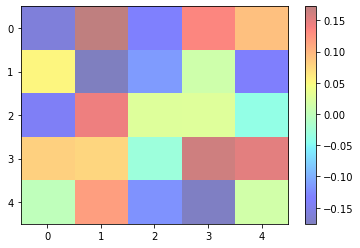

In [138]:
plt.imshow(weight[0, 0, :, :], cmap=light_jet, aspect='auto')
plt.colorbar()
plt.show()

In [139]:
image.shape

(28, 28)

In [140]:
output_data = layer(images.to(device))

In [141]:
output_data = output_data.data

In [142]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [143]:
output = output_data.cpu().numpy()


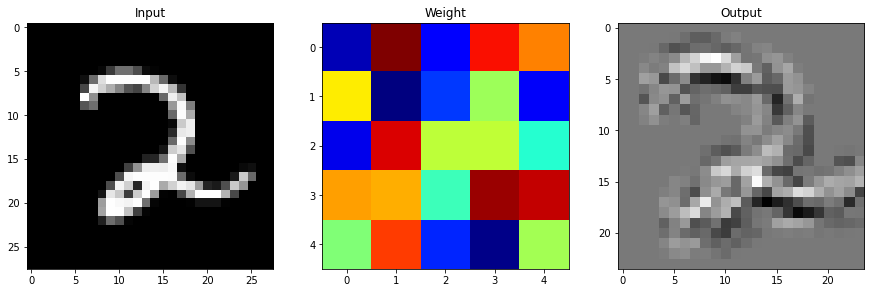

In [144]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('Input')
plt.imshow(image, 'gray')
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title('Output')
plt.imshow(output[0, 0, :, :], 'gray')
plt.show()

In [145]:
output_data.shape

torch.Size([32, 20, 24, 24])

In [146]:
pool = F.max_pool2d(output_data, 2, 2)
pool.shape

torch.Size([32, 20, 12, 12])

In [147]:
pool_arr = pool.cpu().numpy()
pool_arr.shape

(32, 20, 12, 12)

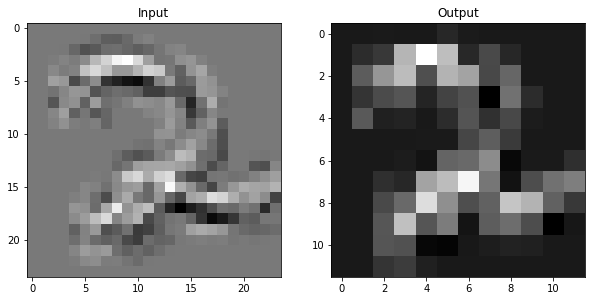

In [148]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title('Input')
plt.imshow(output[0, 0, :, :], 'gray')
plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')
plt.show()

In [149]:
flatten = pool.view(32, -1, 12 * 12)
flatten.shape

torch.Size([32, 20, 144])

In [150]:
lin = nn.Linear(144, 10).to(device)(flatten)
lin.shape

torch.Size([32, 20, 10])

In [151]:
final = lin[0, 0, :].unsqueeze(0)
final

tensor([[ 0.0061, -0.2096, -0.4134, -0.1817, -0.1206,  0.3911, -0.3485, -0.0641,
         -0.0753, -0.0708]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)

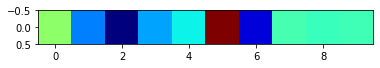

In [152]:
plt.imshow(final.cpu().detach().numpy(), 'jet')
plt.show()

In [153]:
images[0].shape

torch.Size([1, 28, 28])

In [154]:
with torch.no_grad():
    softmax = F.softmax(lin, dim=-1)
softmax[0, 0, :]
np.sum(softmax[0, 0, :].cpu().numpy())

1.0

In [155]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(50*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = x.view(-1, 50*4*4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
       


In [156]:
model = Net()

In [157]:
model.forward(images)

tensor([[-2.3111, -2.2579, -2.2669, -2.2282, -2.2807, -2.3079, -2.3983, -2.3290,
         -2.3008, -2.3561],
        [-2.2545, -2.2579, -2.2795, -2.1843, -2.3129, -2.3186, -2.4166, -2.3264,
         -2.3143, -2.3804],
        [-2.3026, -2.2419, -2.3065, -2.1836, -2.2948, -2.2809, -2.4069, -2.3542,
         -2.2681, -2.4084],
        [-2.2800, -2.2721, -2.2963, -2.2219, -2.2846, -2.3102, -2.3458, -2.3403,
         -2.3013, -2.3823],
        [-2.3027, -2.2280, -2.2809, -2.2583, -2.3012, -2.3055, -2.3781, -2.3254,
         -2.3046, -2.3493],
        [-2.3229, -2.2499, -2.2814, -2.2194, -2.2760, -2.2767, -2.4084, -2.3282,
         -2.2902, -2.3884],
        [-2.3094, -2.2634, -2.3168, -2.2217, -2.2648, -2.3127, -2.3847, -2.3215,
         -2.2336, -2.4144],
        [-2.2946, -2.2509, -2.2540, -2.2084, -2.2864, -2.3032, -2.4482, -2.3077,
         -2.2992, -2.3948],
        [-2.3272, -2.2615, -2.2459, -2.2506, -2.2950, -2.3036, -2.4078, -2.3126,
         -2.2827, -2.3500],
        [-2.2704, -

In [158]:
model = Net()

In [159]:
model.to(device)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [160]:
import torch.optim as optim

In [161]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [162]:
data, target = next(iter(train_loader))

In [163]:
data.shape, target.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [164]:
data, target = data.to(device), target.to(device)

In [165]:
optimizer.zero_grad()

In [166]:
model.train()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [167]:
output = model(data)

In [168]:
output.shape

torch.Size([32, 10])

In [169]:
loss = F.nll_loss(output, target)

In [170]:
loss.backward()

In [171]:
optimizer.step()

In [172]:
epochs = 2
log_interval = 100


In [173]:
for epoch in range(1, epochs + 1):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset), 
                100 * batch_idx / len(train_loader), loss.item()
            ))

    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)))


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.298438
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.285564
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.257610
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.244359
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.218759
Train Epoch: 1 [16000/60000 (27%)]	Loss: 2.192350
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.153289
Train Epoch: 1 [22400/60000 (37%)]	Loss: 2.078018
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.923011
Train Epoch: 1 [28800/60000 (48%)]	Loss: 1.846371
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.747814
Train Epoch: 1 [35200/60000 (59%)]	Loss: 1.483554
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.109677
Train Epoch: 1 [41600/60000 (69%)]	Loss: 0.901731
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.788725
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.549449
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.582490
Train Epoch: 1 [54400/60000 (91%)]	Loss: 0.429330
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.318905

Test set: Average Loss: 0.4223, Accuracy: 9046/10000 (90%)